In [9]:
from scipy.integrate import odeint
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [10]:
tf.version.VERSION

'2.10.0'

In [11]:
#We note that the Lorenz system displays chaos for values of rho between ~24.7 and ~30.1, since rho is 10 we shouldn't observe chaotic behaviour 
beta = 8/3
sigma = 10
rho = 28

#These are some initial conditions, it's possible to choose others
x0 = 0
y0 = 1
z0 = 1.05

In [12]:
def Lorenz(X, t, simga, beta, rho):
    x,y,z = X 
    dxdt = -sigma * (x - y)
    dydt = x * (rho - z) - y
    dzdt = (x * y) - (beta * z)
    return dxdt, dydt, dzdt

In [13]:
#We set up the time points
tmax = 100
n = 10000
t = np.linspace(0, tmax,n)

In [14]:
sol = odeint(Lorenz,(x0, y0, z0),t,args=(sigma, beta, rho))

In [15]:
sol.shape

(10000, 3)

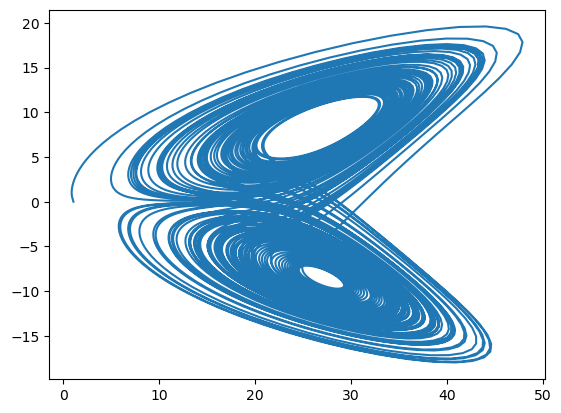

In [16]:
plt.plot(sol[:,2], sol[:, 0], label='x_coord')

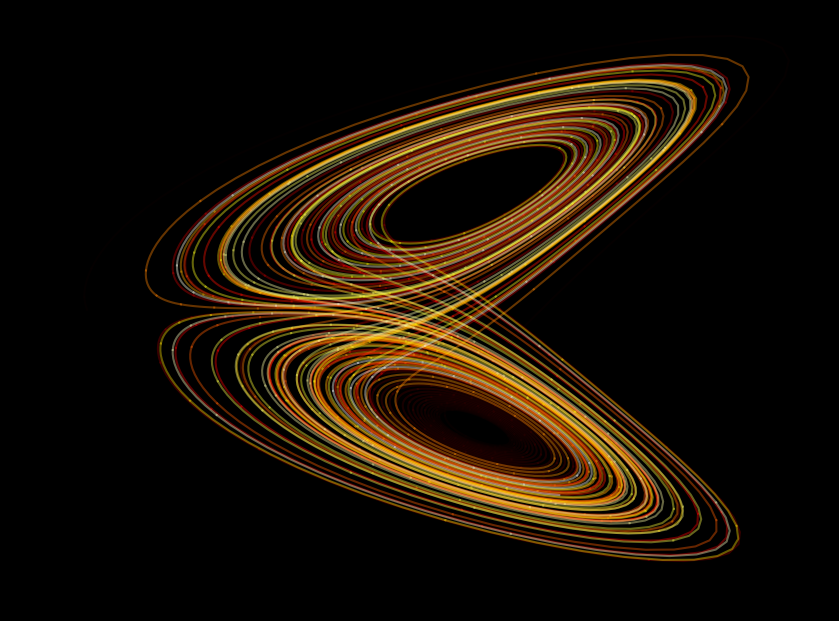

In [21]:
#A prettier 2D graph, though I still have to figure out the axes
s=10
x= sol[:, 0]
y=sol[:, 1]
z=sol[:,2]
WIDTH, HEIGHT, DPI = 1000, 750, 100
fig = plt.figure(facecolor='xkcd:black', figsize=(WIDTH/DPI, HEIGHT/DPI))
ax = plt.axes()
ax.set_facecolor('k')
#ax = plt.axes()
cmap = plt.cm.hot
for i in range(0,n-s,s):
    ax.plot(z[i:i+s+1], x[i:i+s+1], color=cmap(i/n), alpha=0.4)


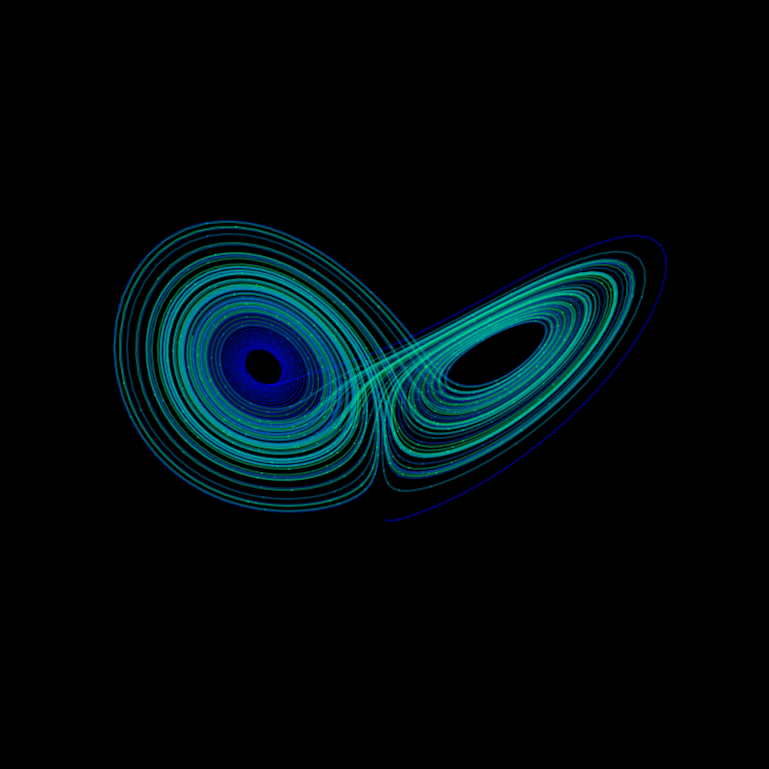

In [184]:
#Let's us make a 3D graph

# WIDTH, HEIGHT, DPI = 1000, 750, 100
# fig = plt.figure(facecolor='k', figsize=(WIDTH/DPI, HEIGHT/DPI))
# ax = plt.axes(projection='3d')
# ax.set_facecolor('k')
# fig.subplots_adjust(left=0, right=1, bottom=0, top=1)
# x= sol[:, 0]
# y=sol[:, 1]
# z=sol[:,2]
# # Make the line multi-coloured by plotting it in segments of length s which
# # change in colour across the whole time series.
# s = 10
# cmap = plt.cm.winter
# for i in range(0,n-s,s):
#     ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=cmap(i/n), alpha=0.4)

# # Remove all the axis clutter, leaving just the curve.
# ax.set_axis_off()